In [46]:
import pandas as pd
df = pd.read_csv('data/iris.csv')

### Observe the first five rows

# Introduction to NLP feature engineering

### Numerical data
Let's considere a the iris dataset 

### Loading the dataset

In [47]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


We observe that the last column, variety is a character, the dataframe is not ready for machine learning. We have to transform this column'values into numerical ones. To do that 
we can use the one hot encoding.

### One hot encoding 
One hot encoding of a categorical column consist of encoding that column  into numerical one by transforming that column into new columns associate to each category. Each new columns has 0 or 1 values, 1 if the row is the good category and 0 otherwise.

let see how to one hot encode a column

In [48]:
df = pd.get_dummies(df, columns=['variety'])


In [49]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


As we have noticed the 'variety' columns was transformed into 03 columns associate to each category. values are equals to zero if it is not the corresponding category 

### Textual data

When We have textual data, we have to preprocess it, in order to be suitable for machine learning models. However, we can't use one hot encoding because it is not categorical data.

there are two steps in the textual preprocessing: 

First we standardize the text and second we vectorize the text

#### different type of standardization tasks
- Converting into lower case
- Converting into base form
#### What is vectorization
The vectorization is the process through which the standardize textual data is transformed into numerical data. 

#### basic features 
With textual data, we can make other tasks like extracting basic features from text like: number of words, average length of a words, number of characters, how many hashtags in a tweet,...
We can also do:
- a POS tagging, for example to extract each word's function in a sentence
- name entry recongnition, to find out if a particular noun refers to a person, a country or an organistion.

### Basic features Extraction

Let' consider ruissian tweets datasets.

In [50]:
df_tweets = pd.read_csv('data/russian_tweets.csv')
df_tweets.head()

,Unnamed: 0,content
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,226970,.@vfpatlas well that's a swella word there (di...
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,161610,Жители обстреливаемых районов Донецка проводят...


We can create a new feature that is the count of characters in each tweets.

In [51]:
# Create a feature char_count
df_tweets['char_count'] = df_tweets[ 'content'].apply(len)

In [52]:
df_tweets.head()

,Unnamed: 0,content,char_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138
2,226970,.@vfpatlas well that's a swella word there (di...,65
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139
4,161610,Жители обстреливаемых районов Донецка проводят...,131


We can also count the number of words in the content column.

In [53]:
def words_count(string):
    """return the number of words in a sentence"""
    words = string.split() 
    return len(words)

df_tweets['words_count'] = df_tweets['content'].apply(words_count)

In [54]:
df_tweets.head()

,Unnamed: 0,content,char_count,words_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130,15
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138,15
2,226970,.@vfpatlas well that's a swella word there (di...,65,12
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139,14
4,161610,Жители обстреливаемых районов Донецка проводят...,131,13


We can also counts words that are hashtags, words that starts with a '#' character

In [55]:
def hashtag_count(string):
    """Return the number of hashtags in a tweets"""
    words = string.split()
    hashtags = [word for word in words if word.startswith('#')]
    return len(hashtags)

df_tweets['hashtag_count'] = df_tweets['content'].apply(hashtag_count)

In [56]:
df_tweets.head()

,Unnamed: 0,content,char_count,words_count,hashtag_count
0,127447,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...,130,15,0
1,123642,Muslim Attacks NYPD Cops with Meat Cleaver. Me...,138,15,1
2,226970,.@vfpatlas well that's a swella word there (di...,65,12,0
3,138339,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...,139,14,0
4,161610,Жители обстреливаемых районов Донецка проводят...,131,13,1


Let's display the distribution of hashtag count 

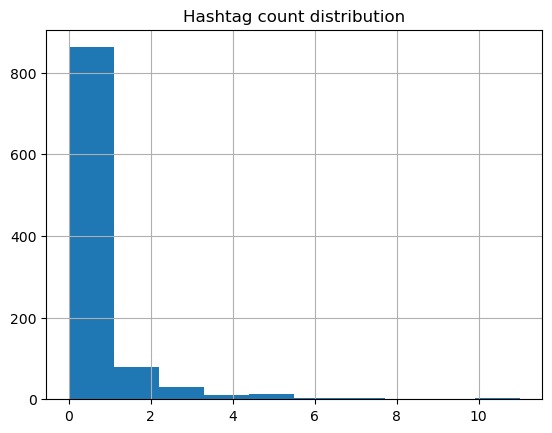

In [57]:
import matplotlib.pyplot as plt 
df_tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

### Readibility test

A readibility test is a test that indicates at what educational level a person needs to be in order to comprehend a particular text. 

There are many readibility test for english language, that includes: 
-The Flesh reading ease 
-The Gunning Fog index
-Simple Measure of Gobbledygook (SMOG)
-dall-shale score


#### Flesh reading ease 
 It is the most widely used readability test. it depends on two factors:
 -The average length of the sentence (the sentence become harder to read if  the length of the sentence increases )
 -The average number of syllabe in a word (Greater the average number of syllabes in a word, harder the text is to read)
 Higher score of the test indicates greater readibility (the text is simple to read)
 Example: A score above 90 is suitable for a 5th grader, while a score below 30 is for college graduates.

#### Gunning Fog Index:

Uses average sentence length and percentage of complex words (words with three or more syllables).
Higher scores indicate more difficult readability.
Example: A score of 6 corresponds to 6th-grade reading level, while a score of 17 is for college graduates.

In python readibility test can be done with the textatistic library. 

### Tokenization and lemmatization
#### Text sources

- New articles (text are grammatically correct )
- Tweets (containing shorthand and hashtags)
- comments (people has tendency to abuse of capital letter and ponctuation)

we have to standardize these texts into a machine friendly format. We want a model to treat similar words as the same.

#### Text preprocessing

The text preprocessing depends on the application you are working on. There are many text preprocessing techniques including:
- Converting words into lowercase
- Removing leading and trailing whitespaces
- Removing punctuation
- Removing stopwords
- Expanding contractions
- Removing special characters (numbers, emojis, etc.)

#### Tokenization 
 The first tasks to do in  text preprocessing is called tokenization:
- Tokenization  is the process of splitting a string into its constituent tokens. Tokens can be sentence, punctuations and is specific to a particular language.
- We can make tokenization with python bu using the spaCy library.
#### Lemmatization
Lematization is the process to transform a word into its lowercase base form or lemma.

### Text cleaning

After tokenization and lemmatization, the next preprocessing step is the text preprocessing. This includes removing:
- unnecessary whitespaces and escape sequences
- punctuations
- Special characters (numbers, emojis, etc.)
- Stopwords

In other words, text cleaning consist of removing non alphabetic tokens and words that occurs so commonly that they are not useful for analysis.